# **Vehicle dataset**

**Used Cars data form websites**

About Dataset
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

**The columns in the given dataset are as follows:**

1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner

# **Import necessary tools**

In [ ]:
pip install --upgrade xgboost scikit-learn

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


#**Import the Libraries**

In [ ]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

#**Data Collecction and Preprocessing**

In [ ]:
# Loading the dataset into a pandas DataFrame
car_data = pd.read_csv('car data.csv')  # Use this to identify issues

In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
car_data.head()


First 5 rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Checking the shape of the dataset
car_data.shape    # Outputs the number of rows and columns in the dataset.

(301, 9)

In [ ]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
car_data.describe()


Statistical Description of the Dataset:


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Check for missing values
missing_values = car_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
# Geerating some Information about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Checking the distribution of categorical data
print("\nDistribution of Categorical Data:")
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())


Distribution of Categorical Data:
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


 **Encoding the Categorical data**

In [ ]:
# Encoding "Fuel_Type" Column
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

<ipython-input-10-400156d666da>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [ ]:
# Encoding "Seller_Type" Column
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

<ipython-input-11-cbcbfa4d86d3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [ ]:
# Encoding the "Transmission" Column
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-12-77ef3d5be865>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
car_data.head()


First 5 rows of the dataset:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


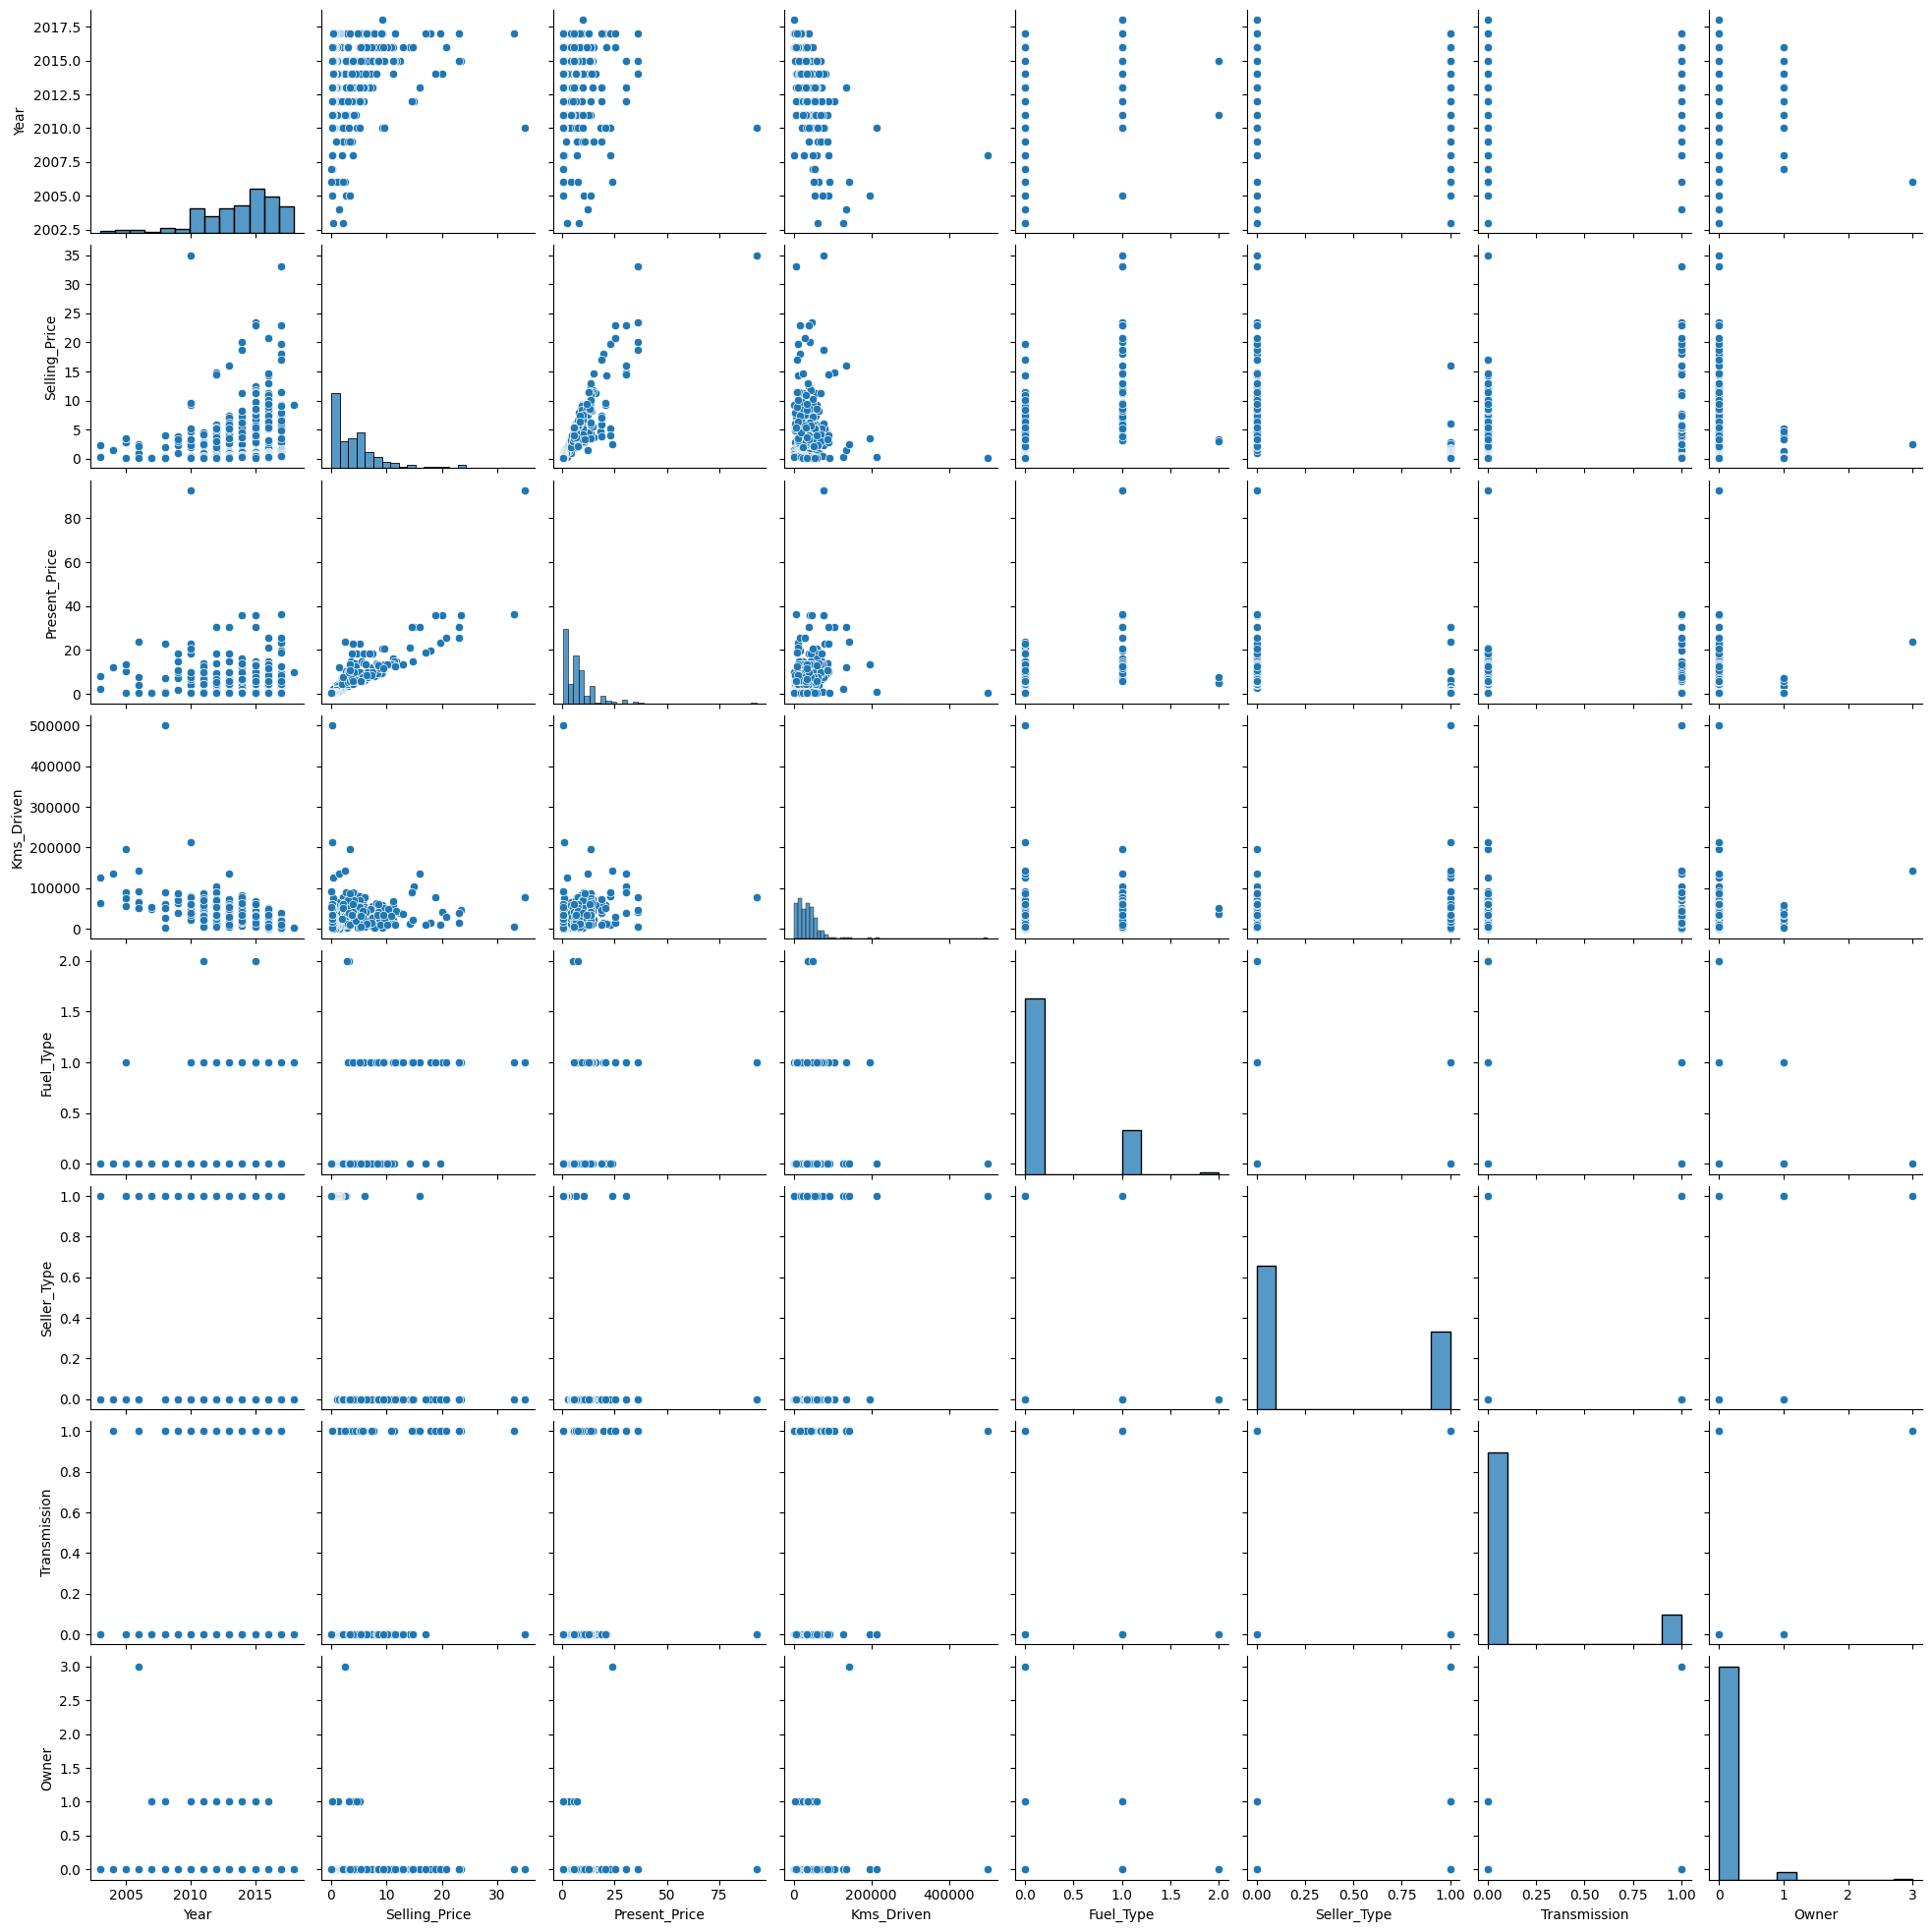

In [ ]:
# Data Understanding & Validation
sns.pairplot(car_data)
plt.show()


In [ ]:
# Splitting features and target
X = car_data.drop(columns=['Car_Name','Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [ ]:
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  

Target (y):
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


# **Splitting the dataset into Training and Test sets**

In [ ]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 301, Training samples: 240, Test samples: 61


In [ ]:
# checking the number of Test and Train dataset
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (240, 7) (61, 7)


# **Model Training**

1. **Linear Regression**

In [ ]:
# Initialize the model
ling_model = LinearRegression()

In [ ]:
# Training the Linear Regression model with train data
ling_model.fit(X_train, y_train)

LinearRegression()

#**Model Evaluation**

In [ ]:
# Evaluate on Training Data
training_data_prediction = ling_model.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.8850
Mean Absolute Error: 1.1667


In [ ]:
# Evaluate on Test Data
test_data_prediction = ling_model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.8435
Mean Absolute Error: 1.2857


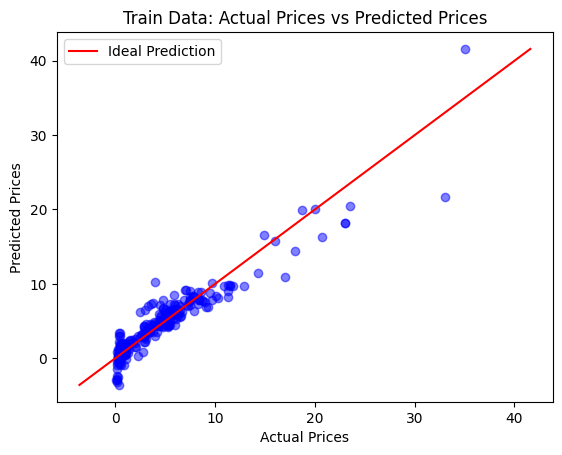

In [ ]:
# Scatter Plot for Train Data
plt.scatter(y_train, training_data_prediction, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Train Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_train), max(training_data_prediction))
min_val = min(min(y_train), min(training_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


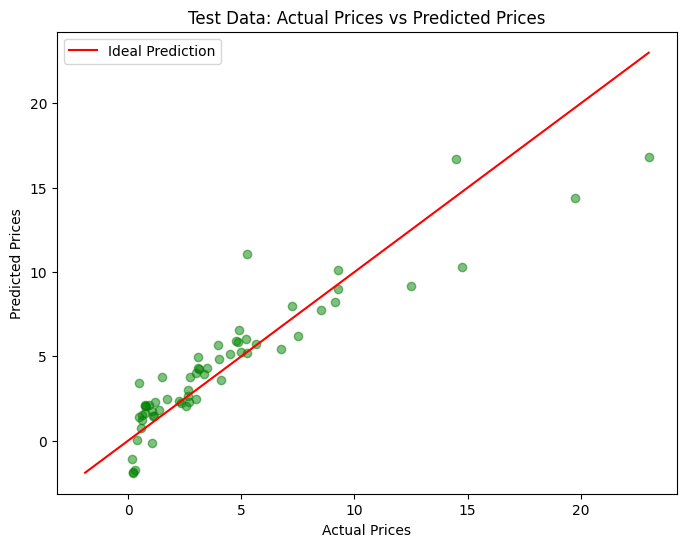

In [ ]:
# Scatter Plot for Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_data_prediction, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_test), max(test_data_prediction))
min_val = min(min(y_test), min(test_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


2. **Lasso Regression**

In [ ]:
# Initialize the model
lass_model = Lasso()

In [ ]:
# Training the Linear Regression model with train data
lass_model.fit(X_train, y_train)

Lasso()

#**Model Evaluation**

In [ ]:
# Evaluate on Training Data
training_data_prediction = lass_model.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.8489
Mean Absolute Error: 1.2671


In [ ]:
# Evaluate on Test Data
test_data_prediction = lass_model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.8137
Mean Absolute Error: 1.2916


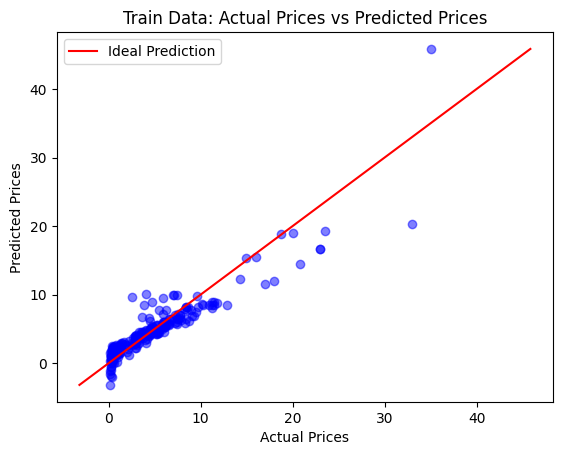

In [ ]:
# Scatter Plot for Train Data
plt.scatter(y_train, training_data_prediction, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Train Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_train), max(training_data_prediction))
min_val = min(min(y_train), min(training_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


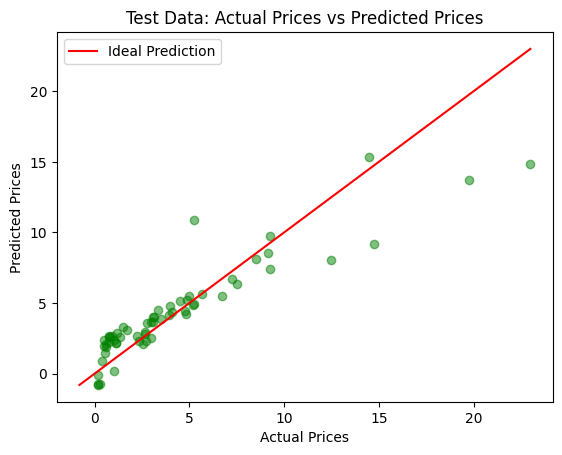

In [ ]:
# Scatter Plot for Test Data
plt.scatter(y_test, test_data_prediction, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_test), max(test_data_prediction))
min_val = min(min(y_test), min(test_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


**Consider XGBRegressor**

In [ ]:
# Initialize the model
GBR_model = GradientBoostingRegressor(random_state=1)

In [ ]:
# Fit the model on the training data
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
# Evaluate on Training Data
training_data_prediction = GBR_model.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.9962
Mean Absolute Error: 0.2396


In [ ]:
# Evaluate on Test Data
test_data_prediction = GBR_model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.9528
Mean Absolute Error: 0.5593


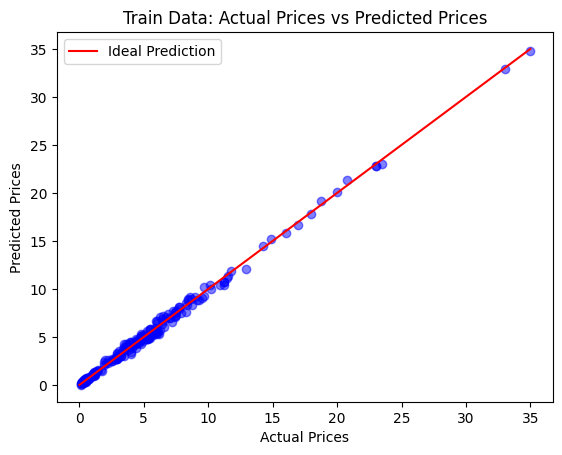

In [ ]:
# Scatter Plot for Train Data
plt.scatter(y_train, training_data_prediction, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Train Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_train), max(training_data_prediction))
min_val = min(min(y_train), min(training_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


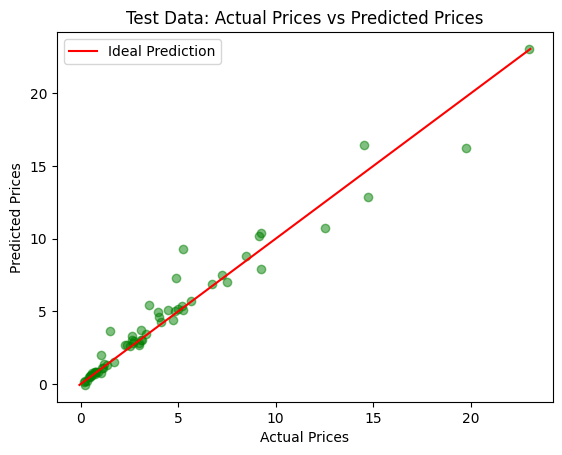

In [ ]:
# Scatter Plot for Test Data
plt.scatter(y_test, test_data_prediction, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_test), max(test_data_prediction))
min_val = min(min(y_test), min(test_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


**Model Tuning**

In [ ]:
# Using hyperparameter tuning for each model to optimize performance
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
gbr = GradientBoostingRegressor(random_state=1)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
# Evaluate on Training Data
training_data_prediction_gs = grid_search.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction_gs)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction_gs)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.9986
Mean Absolute Error: 0.1469


In [ ]:
# Evaluate on Test Data
test_data_prediction_gs = grid_search.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction_gs)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction_gs)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.9515
Mean Absolute Error: 0.5838


**Pipeline Integration**

In [ ]:
# Build a Pipeline to streamline preprocessing and modeling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=1))
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', GradientBoostingRegressor(random_state=1))])

In [ ]:
# Evaluate on Training Data
training_data_prediction_gs = pipeline.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction_gs)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction_gs)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.9962
Mean Absolute Error: 0.2396


In [ ]:
# Evaluate on Test Data
test_data_prediction_gs = pipeline.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction_gs)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction_gs)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.9528
Mean Absolute Error: 0.5593


**Model Comparison**

In [ ]:
# Evaluating all models in a unified framework
models = {
    'Linear Regression': ling_model,
    'Lasso': lass_model,
    'Gradient Boosting': GBR_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    print(f"{name} - R^2: {r2:.4f}, MAE: {mae:.4f}")


Linear Regression - R^2: 0.8435, MAE: 1.2857
Lasso - R^2: 0.8137, MAE: 1.2916
Gradient Boosting - R^2: 0.9528, MAE: 0.5593


**Residual analysis**

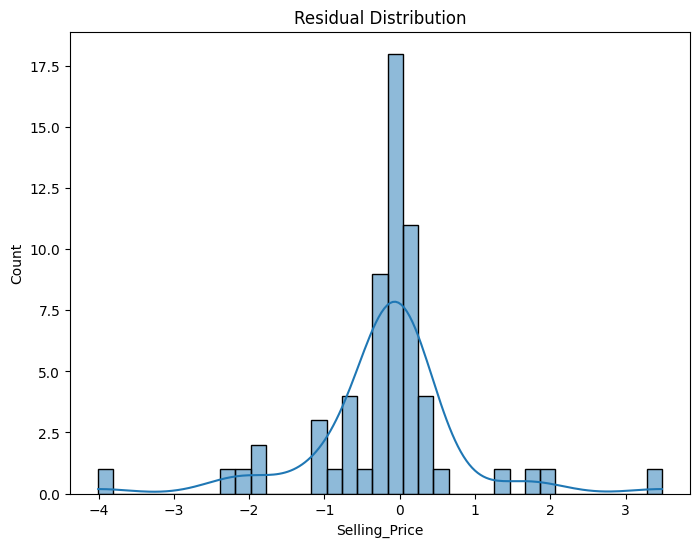

In [ ]:
residuals = y_test - test_data_prediction
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()
